In [1]:
import pandas
from loguru import logger
import ndf.download
from ndf.datamining import datamining
import warnings
import sys
import pandas as pd

warnings.simplefilter(action='ignore', category=FutureWarning)

log_level = 'ERROR'
logger.add(sys.stderr, format="{time} {level} {message}", filter="my_module", level=log_level)
# logger.add(sys.stdout, colorize=True, format="<green>{time}</green> <level>{message}</level>")
logger.add("ndfdownload.log", rotation="30 MB", level=log_level)

2

In [2]:
from datetime import datetime

a = datetime.now()
a.date()

datetime.date(2023, 5, 31)

In [3]:
logger.remove()

In [4]:
d = ndf.download.download()
d.download_all()

bgc ok
tradition ok
prebontullet ok
gfi ok


In [5]:
mining = datamining()

In [6]:
tulletprebon = mining.tulletprebon_calcs()
tulletprebon

,Total for human,Volume
Class,,
BMF1,3.75B,3753800000
BMF2,3.28B,3276400000
BMF3,515M,515000000
BROKEN,595.1M,595100000
LONGER,330M,330000000
PTAX,448M,448000000
TOTAL,9.49B,9488200000
XP,569.9M,569900000


In [7]:
bgc = mining.bgc_calcs()
bgc

,Total for human,Volume
Class,,
BMF,354.5M,354500000
BMF2,346.5M,346500000
BROKEN,6M,6000000
TOTAL,707M,707000000


In [8]:
tradition = mining.tradition_calcs()
tradition

,Total for human,Volume
Class,,
BROKEN,100M,100000000
TOTAL,100M,100000000


In [9]:
gfi = mining.gfi_calcs()
gfi

,Total for human,Volume
Class,,
BMF,1.6B,1599500000
BMF2,1.57B,1572500000
BROKEN,37M,37000000
TOTAL,3.21B,3209000000


In [10]:
tulletprebon['source'] = 'TulletPrebon'
tradition['source'] = 'Tradition'
bgc['source'] = 'bgc'
gfi['source'] = 'gfi'

In [11]:
tradition

,Total for human,Volume,source
Class,,,
BROKEN,100M,100000000,Tradition
TOTAL,100M,100000000,Tradition


In [12]:
pd.DataFrame({'Class': ['TOTAL'], 'Total for human': [0], 'Volume': [0]}).set_index('Class')

,Total for human,Volume
Class,,
TOTAL,0,0


In [13]:
df_result = pd.concat([tulletprebon, tradition, bgc, gfi])
df_result

,Total for human,Volume,source
Class,,,
BMF1,3.75B,3753800000,TulletPrebon
BMF2,3.28B,3276400000,TulletPrebon
BMF3,515M,515000000,TulletPrebon
BROKEN,595.1M,595100000,TulletPrebon
LONGER,330M,330000000,TulletPrebon
PTAX,448M,448000000,TulletPrebon
TOTAL,9.49B,9488200000,TulletPrebon
XP,569.9M,569900000,TulletPrebon
BROKEN,100M,100000000,Tradition


In [14]:
df_totals = df_result.query('Class == "TOTAL"')
df_totals

,Total for human,Volume,source
Class,,,
TOTAL,9.49B,9488200000,TulletPrebon
TOTAL,100M,100000000,Tradition
TOTAL,707M,707000000,bgc
TOTAL,3.21B,3209000000,gfi


In [15]:
df_totals.groupby(['Class']).sum()

,Volume
Class,
TOTAL,13504200000


In [16]:
from numerize import numerize

market_total = df_totals.sum()['Volume']
market_total = numerize.numerize(float(market_total))
market_total

'13.5B'

In [17]:
summary = mining.market_summary()
summary

,Total for human,Volume,source
Class,,,
TOTAL,9.49B,9488200000,TulletPrebon
TOTAL,100M,100000000,Tradition
TOTAL,707M,707000000,bgc
TOTAL,3.21B,3209000000,gfi


In [18]:
market_total = mining.market_total()
market_total

'13.5B'

In [19]:
a = summary[['source', 'Total for human']]
a

,source,Total for human
Class,,
TOTAL,TulletPrebon,9.49B
TOTAL,Tradition,100M
TOTAL,bgc,707M
TOTAL,gfi,3.21B


In [21]:
labels = summary[['source', 'Total for human']]
labels = labels.values.tolist()
labels_chart = []
for item in labels_chart:
        labels_chart.append(f'{item[0]} ${item[1]}')
labels_chart

[]

In [22]:
import matplotlib.pyplot as plt

market_total = mining.market_total()
summary = mining.market_summary()

# Labels prepare
labels = summary[['source', 'Total for human']]
labels = labels.values.tolist()
labels_chart = []
for item in list:
        labels_chart.append(f'{item[0]} ${item[1]}')

font1 = {'family':'serif','color':'blue','size':18}
colors = ['#045ca3', '#f5b12b', '#d11e20', '#8ec5f2']
fig = plt.figure(figsize=(5, 6))
plt.pie(summary['Volume'], labels=labels_chart, labeldistance=1.15, autopct='%1.0f%%',
        wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, colors=colors,
        textprops={'fontsize': 14})
plt.legend(labels_chart, loc='lower left', bbox_to_anchor=(-0.35, .5), fontsize=10)
plt.title(f'NDF Market Summary\n Total ${market_total}', fontdict=font1)
plt.savefig('pie.png', dpi=fig.dpi, bbox_inches='tight')


TypeError: 'type' object is not iterable

In [ ]:
print(plt.savefig('pie.png', dpi=fig.dpi, bbox_inches='tight'))

In [ ]:
mining.market_total()

In [ ]:
mining.market_summary()

True

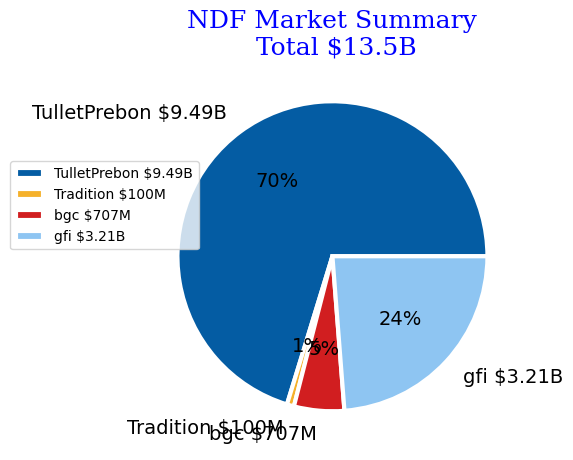

In [23]:
mining.generate_chart()